In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
Mouse = pd.read_csv("Mouse_metadata.csv")
Results = pd.read_csv("Study_results.csv").drop_duplicates("Mouse ID")
combined_df = pd.merge(Mouse, Results, how="inner", on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [3]:
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [4]:
drug= pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

drugs_df = drug[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

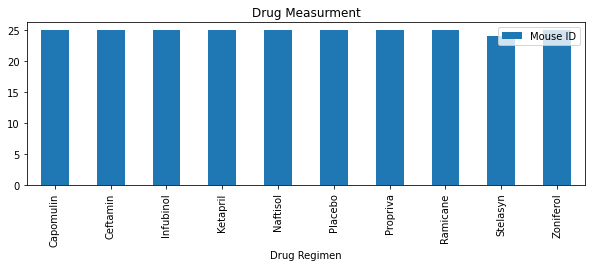

<Figure size 432x288 with 0 Axes>

In [5]:
drugs_df.plot(kind="bar", figsize=(10,3))
plt.title("Drug Measurment")
plt.show()
plt.tight_layout()

In [6]:
drugs = summary_df.index.tolist()
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [7]:
drugs_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drugs_count

[25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

In [8]:
axis_x = np.arange(len(drugs_count))

Text(0, 0.5, 'Count')

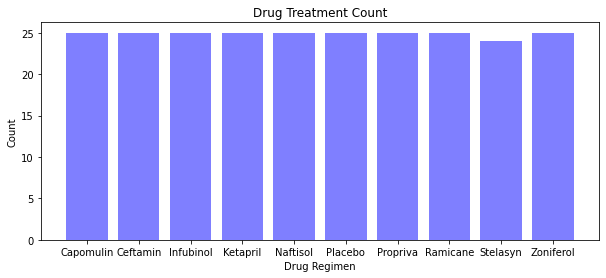

In [9]:
axis_x = drugs
plt.figure(figsize=(10,4))
plt.bar(axis_x, drugs_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [10]:
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,124,124,124,124,124,124,124
1,Male,125,125,125,125,125,125,125


In [11]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


Text(0, 0.5, '')

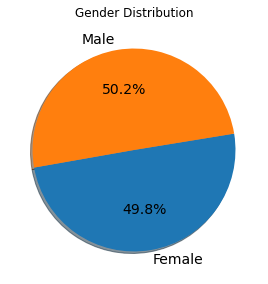

In [12]:
plt.figure(figsize=(10,6))
axis = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=axis, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Gender Distribution")
plt.xlabel("")
plt.ylabel("")

In [13]:
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[124, 125]

In [14]:
labels = ["Female", "Male"]
colors = ["blue", "orange"]

(-1.1000791940320744,
 1.1016630746735625,
 -1.1017685314144796,
 1.1009347297692742)

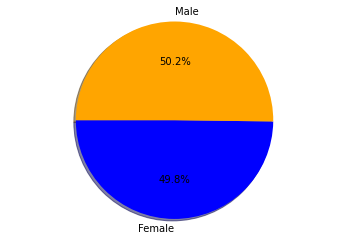

In [15]:
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")

In [16]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0


In [17]:
best_treatments = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_treatments = best_treatments.sort_values(["Timepoint"], ascending=True)
best_treatments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
136,l661,Ceftamin,Male,18,26,0,45.0,0
135,l558,Ceftamin,Female,13,30,0,45.0,0
134,l490,Ceftamin,Male,24,26,0,45.0,0
133,l471,Ceftamin,Female,7,28,0,45.0,0
...,...,...,...,...,...,...,...,...
28,l897,Capomulin,Male,17,19,0,45.0,0
27,d251,Ramicane,Female,8,19,0,45.0,0
26,q610,Ramicane,Female,18,21,0,45.0,0
36,v923,Capomulin,Female,19,21,0,45.0,0


In [18]:
best_treatments_sort = best_treatments.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
new_df=best_treatments_sort.head()
new_df = pd.DataFrame(new_df)
new_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128                    45.0
             b742                    45.0
             f966                    45.0
             g288                    45.0
             g316                    45.0

In [19]:
quartiles = new_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

KeyError: 0.25

In [22]:
final_df = new_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex("Capomulin")
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels="Capoulin")
plt.ylim(10, 80)
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'Capomulin' was passed